# Emotion Diary Project - Hugging Face

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [2]:
df = pd.read_csv('Emotion_final.csv')
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
df.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i feel so tortured by it,happy
freq,2,7029


In [4]:
df_emotion = df.groupby(['Emotion']).count()
df_emotion.reset_index(inplace=True)
df_emotion

,Emotion,Text
0,anger,2993
1,fear,2652
2,happy,7029
3,love,1641
4,sadness,6265
5,surprise,879


In [5]:
df_emotion['Text']

0    2993
1    2652
2    7029
3    1641
4    6265
5     879
Name: Text, dtype: int64

<BarContainer object of 6 artists>

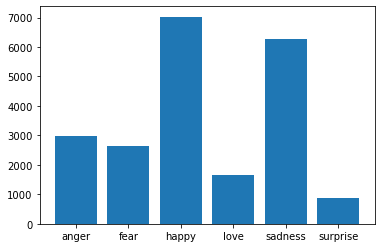

In [6]:
fig, ax = plt.subplots()

ax.bar(df_emotion['Emotion'], df_emotion['Text'])

In [7]:
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [8]:
X = df.Text.values
y = df.Emotion.values

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
print('=============================================')

sgd = Pipeline(steps=[('vc_tfidf',
                 TfidfVectorizer(max_df=0.9, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf', SGDClassifier(random_state=42))])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('SGDClassifier')
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
print('=============================================')

SGDClassifier
accuracy 0.8956509460604349
              precision    recall  f1-score   support

       anger       0.92      0.85      0.89       993
        fear       0.90      0.83      0.86       871
       happy       0.88      0.95      0.91      2279
        love       0.88      0.77      0.82       550
     sadness       0.91      0.94      0.92      2110
    surprise       0.83      0.71      0.77       279

    accuracy                           0.90      7082
   macro avg       0.89      0.84      0.86      7082
weighted avg       0.90      0.90      0.89      7082



Accuracy: 0.8956509460604349


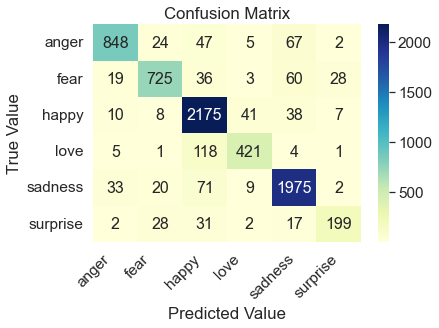

In [12]:


print("Accuracy:", accuracy_score(y_test, y_pred))
labels_6 = ['anger', 'fear', 'happy', 'love', 'sadness', 'surprise'] 

def print_cf1(y_test, y_hat):
    cm = confusion_matrix(y_test, y_hat)
    sns.set(font_scale = 1.4, color_codes=True, palette="deep")
    sns.heatmap(pd.DataFrame(cm, index=labels_6,columns=[0,1,2,3,4,5]), 
                annot = True,
                annot_kws = {"size":16},
                fmt="d",
                cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Value")
    plt.xticks([0,1,2,3,4,5], labels_6, rotation=45)
    plt.ylabel("True Value")
    plt.show()
    
print_cf1(y_test, y_pred)